# Does Fandango still show Good Ratings to Bad Movies? : Analyzing Ratings of Popular Movies from 2015-2016

Fandango had made a controversy in which the ratings for the movies on their size are relatively higher than any other similar websites(Rotten Tomatoes, iMDB, etc). This was found after Hickey analyze their website. Hickey found out that Fandango always round up ignoring the mathematical method we always use. For example, a movie with 4.1 actual rating would have 4.5 rating instead of 4.0. Fandango said that it was a bug in the system and not done intentionally.

The goal of the project is to compare the movies of the year 2015 and the year 2015 to 2016. This is to know if they have applied any changes to their website. The data used for 2015 is the same data Hickey used before analysis.The data used for 2016 is provided by one of the members of Dataquests.



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np

# Reading and Understanding the Data

 Before Fandango : Old Fandango(Assumed with high ratings)
 After Fandango : New Fandango that will be compared to old Fandango

In [12]:
before_fandango = pd.read_csv("fandango_score_comparison.csv")
after_fandango = pd.read_csv("movie_ratings_16_17.csv")
#efore_fandango.head()
#after_fandango.head()

## Picking Only Valuable Columns

In [15]:
before = before_fandango[["FILM","Fandango_Stars","Fandango_Ratingvalue","Fandango_votes","Fandango_Difference"]]
before.columns = ["Film","Fandango_Stars","Fandango_Ratingvalue","Fandango_votes","Fandango_Difference"]

after = after_fandango[["movie","year","fandango"]]
after.columns = ["Movie","Year","Fandango"]
after["Year"].describe()

### Making a Year Column for the 2015 Data

In [18]:
def getYear(element):
    pattern = r"([A-Za-z0-9\s:_]+)"
    return int(re.findall(pattern, element)[-1])

before_fandango["Year"] = before["Film"].apply(getYear)
before = before_fandango[["FILM","Fandango_Stars","Fandango_Ratingvalue","Fandango_votes","Fandango_Difference","Year"]]
print("Min: "+str(min(before["Year"])))
print("Max: "+str(max(before["Year"])))

Min: 2014
Max: 2015


In [19]:
before = before_fandango[["FILM","Fandango_Stars","Fandango_Ratingvalue","Fandango_votes","Fandango_Difference","Year"]]
#before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [41]:
#after.head()

,Movie,Year,Fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


## Datasets are not representative
* The data are not representative for the population because the sampling used a criteria.
 -  Fandango Ratings for 2015 is not random since it required a 30 reveiews per movie
 -  Fandango Ratings for 2016 - 2017 is also not random since it pick movies with significant number of votes

## Change slightly the goal
* Since the dataset are not representative for the whole population. We could change our population to "Popular Movies".
* The goal of the project is to compare the movies of the year 2015 and the year 2016

In [21]:
#before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [22]:
#after_fandango.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [23]:
#after_fandango.sample(10, random_state = 1)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
108,Mechanic: Resurrection,2016,38,5.6,29,41,4.0,1.90,2.80,1.45,2.05,2.0,3.0,1.5,2.0
206,Warcraft,2016,32,7.0,28,71,4.0,1.60,3.50,1.40,3.55,1.5,3.5,1.5,3.5
106,Max Steel,2016,22,4.6,0,38,3.5,1.10,2.30,0.00,1.90,1.0,2.5,0.0,2.0
107,Me Before You,2016,51,7.4,58,73,4.5,2.55,3.70,2.90,3.65,2.5,3.5,3.0,3.5
51,Fantastic Beasts and Where to Find Them,2016,66,7.5,73,81,4.5,3.30,3.75,3.65,4.05,3.5,4.0,3.5,4.0
33,Cell,2016,38,4.3,11,16,3.0,1.90,2.15,0.55,0.80,2.0,2.0,0.5,1.0
59,Genius,2016,56,6.5,51,45,3.5,2.80,3.25,2.55,2.25,3.0,3.0,2.5,2.0
152,Sully,2016,74,7.5,85,85,4.5,3.70,3.75,4.25,4.25,3.5,4.0,4.0,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
31,Captain America: Civil War,2016,75,7.9,90,89,4.5,3.75,3.95,4.50,4.45,4.0,4.0,4.5,4.5


Fandango Rating system are replaced by Tomato Audience Score system. 
After checking the samples. The criteria from the dataset is supposed to have atleast 30 fan reviews. Audience Score are for audience or not critics while  is Tomatometer for critics. Audience Score seems more similar to Fan Reviews of Fandango but the counts is somewhat greater. 

The way I verified if the sample is popular is by basing on the Tomatometer which has values are near the old criteria. I could normalize(?) maybe the audience score or have new threshold for Audience Score.

Movie: Audience Score / TOMATOMETER

* Mechanic: Resurrection: 25,606
* Warcraft:31,526
* Max Steel: 6,824
* Me Before You:30,603 / 174
* Fantastic Beasts and Where to Find Them:87,754 / 333
* Cell:3,801 / 54
* Genius:2,879 / 109
* Sully:48,438 / 337
* A Hologram for the King:10,210 / 146
* Captain America: Civil War: 179,724 /  406


In [24]:
movies_2015 = before[before["Year"] == 2015]
#movies_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [25]:
movies_2016 = after[after["Year"] == 2016]
#movies_2016.head()

,Movie,Year,Fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


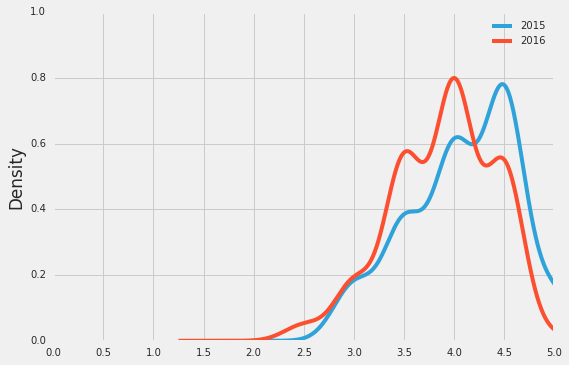

In [27]:
%matplotlib inline
#dont forget this sht
plt.style.use('fivethirtyeight')
movies_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
movies_2016['Fandango'].iloc[0:130].plot.kde(label = '2016', legend = True)
plt.ylim(0,1)
plt.xlim(0,5)
plt.xticks(np.arange(0,5.1,.5))
plt.show()


Movies from 2015 have smaller count, therefore, I cut the length for the movies of 2016. 

* Both distribution shows left skeweness
* 2015 is sligthly more skewed than 2016

The light shift from 2015 to 2016 distribution is interesting for this project. The peak for 2016 have a difference of 0.5 compared to 2015. This indeed showed that movies in 2016 are rated lower than 2015

The left skeweness shows that most of the popular movies are rated between 3.5 to 4.5 stars. Since the population we used are popular movies, this may reflect the left skeweness of both distribution.

## Analyzing Distribution of the Raw Data with Pie Chart

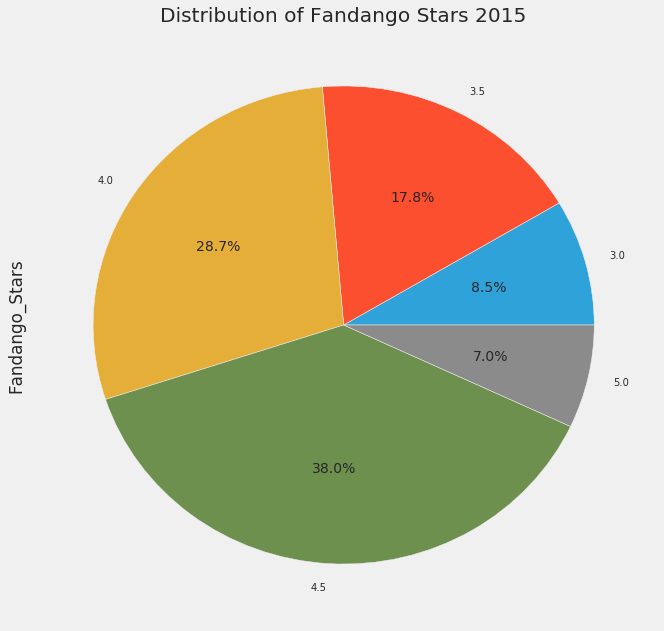

In [28]:
movies_2015['Fandango_Stars'].value_counts().sort_index().plot.pie(figsize = (10,10),autopct = '%.1f%%',title="Distribution of Fandango Stars 2015")

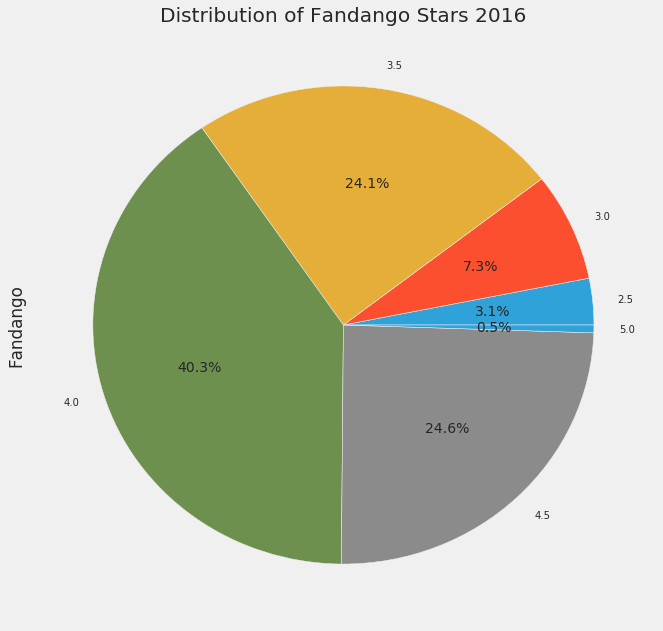

In [29]:
movies_2016['Fandango'].value_counts().sort_index().plot.pie(figsize = (10,10),autopct = '%.1f%%', title="Distribution of Fandango Stars 2016")


* 5.0 ratings has decreased
* 4.5 ratings has decreased
* 4.0 increased
* 3.5 increased
* 3.0 decreased
* 2.5 has ratings showed in 2016 movies.

## Grouping the Ratings with Low Decent and High

In [30]:
def rate_nom(element):
    if element >= 4.5:
        return "High Rate"
    elif (element < 4.5) & (element >=3.5):
        return "Decent"
    else:
        return "Low Rate"


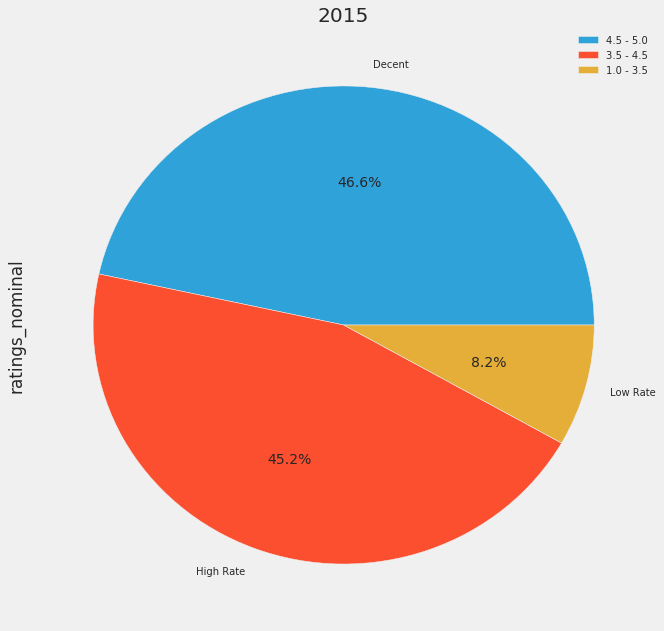

In [34]:
before_fandango['ratings_nominal'] = movies_2015["Fandango_Stars"].apply(rate_nom)
movies_2015 = before_fandango[["FILM","Fandango_Stars","Fandango_Ratingvalue","Fandango_votes","Fandango_Difference","Year","ratings_nominal"]]
movies_2015["ratings_nominal"].value_counts().plot.pie(figsize = (10,10),autopct = '%.1f%%', title = "2015")
plt.style.use('fivethirtyeight')
legends = plt.legend()
legends.get_texts()[0].set_text("4.5 - 5.0")
legends.get_texts()[1].set_text("3.5 - 4.5")
legends.get_texts()[2].set_text("1.0 - 3.5")
plt.show()

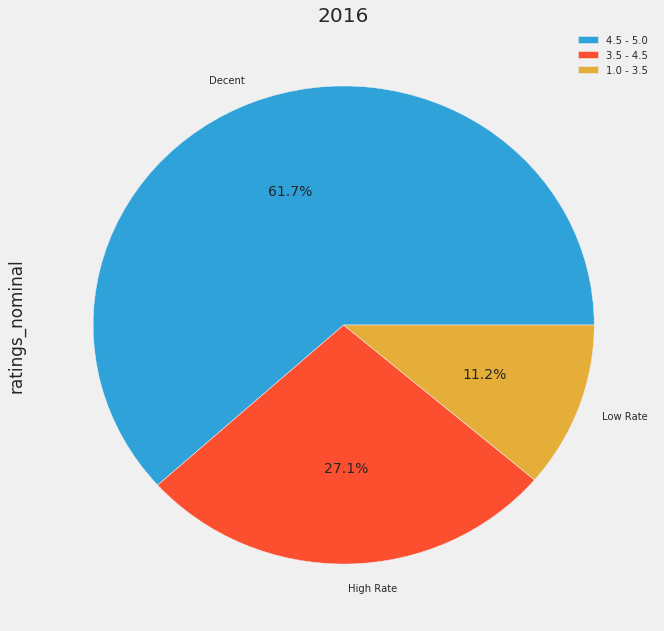

In [32]:
after_fandango['ratings_nominal'] = after_fandango["fandango"].apply(rate_nom)
movies_2016 = after_fandango[["movie","year","fandango","ratings_nominal"]]
movies_2016["ratings_nominal"].value_counts().plot.pie(figsize = (10,10),autopct = '%.1f%%', title = "2016")
legends = plt.legend()
legends.get_texts()[0].set_text("4.5 - 5.0")
legends.get_texts()[1].set_text("3.5 - 4.5")
legends.get_texts()[2].set_text("1.0 - 3.5")
plt.show()

High Ratings is almost 50% of the samples for the 2015 movies but in the 2016, high ratings were almost halve (27%). The ratings with 3.5 to 4.5 grew more than half, as for the Low Ratings, it grew by 3%. 

# ------------------------------------------------------------
## UNFINISHED due to lack of knowledge. But maybe this is for identifying if the data has large deviation

In [35]:
summary_stats = [[]]
dfs = [movies_2015["Fandango_Stars"],movies_2016["fandango"]]
summary_2015 = [2015]
summary_2016 = [2016]
summaries = [summary_2015,summary_2016]
for i in range(2):
    mean = dfs[i].mean()
    median = dfs[i].median()
    mode = dfs[i].mode()
    summaries[i].append(mean)
    summaries[i].append(median)
    summaries[i].append(mode[0])

summaries = pd.DataFrame(summaries, columns=["Year","Mean","Median","Mode"])

In [36]:
summaries

,Year,Mean,Median,Mode
0,2015,4.089041,4.0,4.5
1,2016,3.894860,4.0,4.0


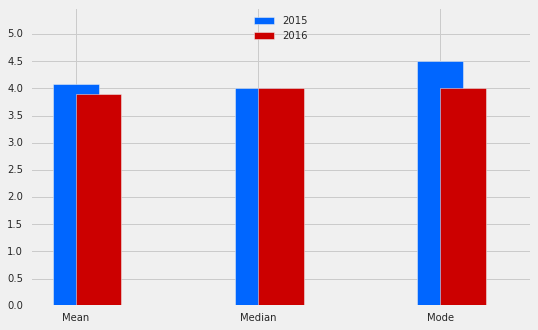

In [37]:
summaries.iloc[0][["Mean","Median","Mode"]].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summaries.iloc[1][["Mean","Median","Mode"]].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.legend(framealpha = 0, loc = 'upper center')